In [1]:
%load_ext cudf.pandas

# Computation


## Learning Objectives

- Do basic arithmetic with DataArrays and Datasets
- Perform aggregation (reduction) along one or multiple dimensions of a
  DataArray or Dataset


## Arithmetic Operations

Arithmetic operations with a single DataArray automatically vectorize (like
numpy) over all array values:


In [2]:
%%cudf.pandas.profile

import xarray as xr

                                                                                              
                                  Total time elapsed: 1.585 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [3]:
%%cudf.pandas.profile

ds = xr.open_dataset("../../data/sst.mnmean.nc")
da = ds["sst"]
da

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)>
[2050560 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

                                                                                                               
                                           Total time elapsed: 3.477 seconds                                   
                                        291 GPU function calls in 0.126 seconds                                
                                        16 CPU function calls in 0.011 seconds                                 
                                                                                                               
                                                         Stats                                                 
                                                                                                               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                  ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ isna                      │ 0          │ 0.000       │ 0.000       │ 8          │ 0.005       │ 0.001       │
│ to_timedelta              │ 0          │ 0.000       │ 0.000       │ 6          │ 0.005       │ 0.001       │
│ ndarray.reshape           │ 0          │ 0.000       │ 0.000       │ 2          │ 0.002       │ 0.001       │
│ Index                     │ 3          │ 0.008       │ 0.003       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__len__      │ 170        │ 0.052       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy         │ 4          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__setattr__  │ 4          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__len__     │ 85         │ 0.026       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.copy        │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__setattr__ │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__  │ 12         │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__getitem__ │ 6          │ 0.005       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__     │ 2          │ 0.014       │ 0.007       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__repr__    │ 1          │ 0.005       │ 0.005       │ 0          │ 0.000       │ 0.000       │
└───────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- isna
- to_timedelta
- ndarray.reshape

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=834260;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [4]:
%%cudf.pandas.profile

da + 273.15

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)>
array([[[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
...
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01

                                                                                                               
                                           Total time elapsed: 0.460 seconds                                   
                                        234 GPU function calls in 0.100 seconds                                
                                         0 CPU function calls in 0.000 seconds                                 
                                                                                                               
                                                         Stats                                                 
                                                                                                               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                  ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__      │ 142        │ 0.043       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__  │ 12         │ 0.013       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__len__     │ 71         │ 0.022       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__getitem__ │ 6          │ 0.005       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__     │ 2          │ 0.012       │ 0.006       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__repr__    │ 1          │ 0.005       │ 0.005       │ 0          │ 0.000       │ 0.000       │
└───────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

## Aggregation (Reduction) Methods

Xarray supports many of the aggregations methods that numpy has. A partial list
includes: all, any, argmax, argmin, max, mean, median, min, prod, sum, std, var.

Whereas the numpy syntax would require scalar axes, xarray can use dimension
names:


In [5]:
%%cudf.pandas.profile

da_mean = da.mean(dim="time")
da_mean

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.7965822, -1.7966435, -1.7966874, ..., -1.7976037, -1.796984 ,
        -1.7965525],
       [-1.7968166, -1.7963768, -1.796082 , ..., -1.7992076, -1.7980535,
        -1.7973973],
       [-1.7999136, -1.798993 , -1.7984267, ..., -1.7992468, -1.7995085,
        -1.7997851],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

                                                                                                              
                                          Total time elapsed: 0.247 seconds                                   
                                       156 GPU function calls in 0.065 seconds                                
                                        0 CPU function calls in 0.000 seconds                                 
                                                                                                              
                                                        Stats                                                 
                                                                                                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                 ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__     │ 142        │ 0.043       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__ │ 12         │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__    │ 2          │ 0.012       │ 0.006       │ 0          │ 0.000       │ 0.000       │
└──────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

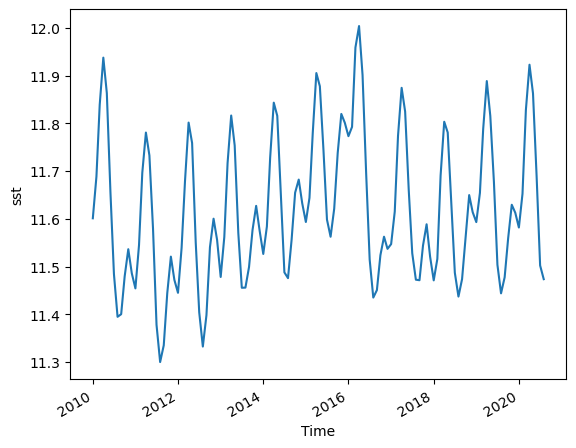

                                                                                                           
                                         Total time elapsed: 3.853 seconds                                 
                                      15 GPU function calls in 0.005 seconds                               
                                       0 CPU function calls in 0.000 seconds                               
                                                                                                           
                                                       Stats                                               
                                                                                                           
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function              ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ DatetimeIndex.__len__ │ 14         │ 0.004       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.copy    │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
└───────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [6]:
%%cudf.pandas.profile

da.std(dim=["lat", "lon"]).plot()

## Broadcasting:

**Broadcasting** allows an operator or a function to act on two or more arrays
to operate even if these arrays do not have the same shape. That said, not all
the dimensions can be subjected to broadcasting; they must meet certain rules.
The image below illustrates how performing an operation on arrays with
differently coordinates will result in automatic broadcasting

![](../../images/broadcasting.png)

Credit: Stephan Hoyer --
[xarray ECMWF Python workshop](https://docs.google.com/presentation/d/16CMY3g_OYr6fQplUZIDqVtG-SKZqsG8Ckwoj2oOqepU/)


In [7]:
%%cudf.pandas.profile

da.shape, da.dims

((128, 89, 180), ('time', 'lat', 'lon'))

                                                                                              
                                  Total time elapsed: 0.034 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [8]:
%%cudf.pandas.profile

da_mean.shape, da_mean.dims

((89, 180), ('lat', 'lon'))

                                                                                              
                                  Total time elapsed: 0.034 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [9]:
%%cudf.pandas.profile

# Subtract the mean (2D array) from the original array (3D array)
x = da - da_mean
x

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)>
array([[[-3.4177303e-03, -3.3564568e-03, -3.3125877e-03, ...,
         -2.3962259e-03, -3.0159950e-03, -3.4474134e-03],
        [-3.1833649e-03, -3.6231279e-03, -3.9179325e-03, ...,
         -7.9238415e-04, -1.9464493e-03, -2.6026964e-03],
        [-8.6307526e-05, -1.0069609e-03, -1.5732050e-03, ...,
         -7.5316429e-04, -4.9149990e-04, -2.1481514e-04],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-3.4177303e-03, -3.3564568e-03, -3.3125877e-03, ...,
         -2.3962259e-03, -3.0159950e-03, -3.4474134e-03],
        [-3.1833649e-03, -3.6231279e-03, -3.9179325e-03, ...,
         -7.9238415e-04, -1.9464493e-03, -2.6026964e-03],
        [-8.6307526e-05, -1.0069609e-03, -1.5732050e-03, ...,
         -7.5316429e-04, -4.9149990e-04, -2.1481514e-04],
...
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-3.4177303e-03, -3.3564568e-03, -3.3125877e-03, ...,
         -2.3962259e-03, -3.0159950e-03, -3.4474134e-03],
        [-3.1833649e-03, -3.6231279e-03, -3.9179325e-03, ...,
         -7.9238415e-04, -1.9464493e-03, -2.6026964e-03],
        [-8.6307526e-05, -1.0069609e-03, -1.5732050e-03, ...,
         -7.5316429e-04, -4.9149990e-04, -2.1481514e-04],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01

                                                                                                               
                                           Total time elapsed: 0.429 seconds                                   
                                        299 GPU function calls in 0.113 seconds                                
                                         0 CPU function calls in 0.000 seconds                                 
                                                                                                               
                                                         Stats                                                 
                                                                                                               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                  ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__      │ 188        │ 0.055       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__len__     │ 83         │ 0.024       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy         │ 4          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.copy        │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.equals       │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__  │ 12         │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__getitem__ │ 6          │ 0.005       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__     │ 2          │ 0.012       │ 0.006       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__repr__    │ 1          │ 0.005       │ 0.005       │ 0          │ 0.000       │ 0.000       │
└───────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

## High level computation: groupby, resample, rolling, coarsen, weighted

Xarray has some very useful high level objects that let you do common
computations:

- `groupby` :
  [Bin data in to groups and reduce](https://docs.xarray.dev/en/stable/groupby.html)
- `resample` :
  [Groupby specialized for time axes. Either downsample or upsample your data](https://docs.xarray.dev/en/stable/user-guide/time-series.html#resampling-and-grouped-operations).
- `rolling` :
  [Operate on rolling windows of your data e.g. running mean](https://docs.xarray.dev/en/stable/user-guide/computation.html#rolling-window-operations)
- `coarsen` :
  [Downsample your data](https://docs.xarray.dev/en/stable/user-guide/computation.html#coarsen-large-arrays)
- `weighted` :
  [Weight your data before applying reductions](https://docs.xarray.dev/en/stable/user-guide/computation.html#weighted-array-reductions)


### groupby


In [10]:
%%cudf.pandas.profile

ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 128)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Data variables:
    sst      (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

                                                                                                               
                                           Total time elapsed: 0.421 seconds                                   
                                        234 GPU function calls in 0.187 seconds                                
                                         0 CPU function calls in 0.000 seconds                                 
                                                                                                               
                                                         Stats                                                 
                                                                                                               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                  ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__      │ 142        │ 0.042       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__  │ 12         │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__len__     │ 71         │ 0.113       │ 0.002       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__getitem__ │ 6          │ 0.005       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__     │ 2          │ 0.011       │ 0.006       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__repr__    │ 1          │ 0.005       │ 0.005       │ 0          │ 0.000       │ 0.000       │
└───────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [11]:
%%cudf.pandas.profile

# seasonal groups
ds.groupby("time.season")

DatasetGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

                                                                                                                
                                           Total time elapsed: 0.157 seconds                                    
                                         77 GPU function calls in 0.042 seconds                                 
                                         0 CPU function calls in 0.000 seconds                                  
                                                                                                                
                                                         Stats                                                  
                                                                                                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                   ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ DatetimeIndex.__len__      │ 37         │ 0.015       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.copy         │ 3          │ 0.002       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__setattr__  │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__deepcopy__ │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Series                     │ 1          │ 0.003       │ 0.003       │ 0          │ 0.000       │ 0.000       │
│ Index                      │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.__len__        │ 29         │ 0.009       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.set_names      │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ factorize                  │ 1          │ 0.008       │ 0.008       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.__getitem__    │ 2          │ 0.003       │ 0.001       │ 0          │ 0.000       │ 0.000       │
└────────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [12]:
%%cudf.pandas.profile

# day of the week groups
ds.groupby("time.dayofweek")

DatasetGroupBy, grouped over 'dayofweek'
7 groups with labels 0, 1, 2, 3, 4, 5, 6.

                                                                                                                
                                           Total time elapsed: 0.459 seconds                                    
                                         79 GPU function calls in 0.355 seconds                                 
                                         0 CPU function calls in 0.000 seconds                                  
                                                                                                                
                                                         Stats                                                  
                                                                                                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                   ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ DatetimeIndex.__len__      │ 37         │ 0.013       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.copy         │ 3          │ 0.002       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__setattr__  │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__deepcopy__ │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Series                     │ 1          │ 0.002       │ 0.002       │ 0          │ 0.000       │ 0.000       │
│ ndarray.reshape            │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ ndarray.astype             │ 1          │ 0.319       │ 0.319       │ 0          │ 0.000       │ 0.000       │
│ Index                      │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__len__         │ 29         │ 0.009       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.set_names       │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ factorize                  │ 1          │ 0.006       │ 0.006       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__getitem__     │ 2          │ 0.002       │ 0.001       │ 0          │ 0.000       │ 0.000       │
└────────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [13]:
%%cudf.pandas.profile

# compute a seasonal mean
seasonal_mean = ds.groupby("time.season").mean()
seasonal_mean

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, season: 4)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst      (season, lat, lon) float32 -1.799 -1.799 -1.8 -1.8 ... nan nan nan
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

                                                                                                                
                                           Total time elapsed: 0.721 seconds                                    
                                        594 GPU function calls in 0.238 seconds                                 
                                         0 CPU function calls in 0.000 seconds                                  
                                                                                                                
                                                         Stats                                                  
                                                                                                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                   ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ DatetimeIndex.__len__      │ 62         │ 0.022       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.copy         │ 8          │ 0.004       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__setattr__  │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__deepcopy__ │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Series                     │ 1          │ 0.002       │ 0.002       │ 0          │ 0.000       │ 0.000       │
│ Index                      │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.__len__        │ 85         │ 0.025       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.set_names      │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ factorize                  │ 1          │ 0.006       │ 0.006       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__getitem__  │ 5          │ 0.018       │ 0.004       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__len__       │ 352        │ 0.104       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy          │ 20         │ 0.008       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.equals        │ 18         │ 0.008       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.set_names     │ 12         │ 0.007       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__setattr__   │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.copy           │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.__setattr__    │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__   │ 12         │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.__getitem__    │ 6          │ 0.007       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__      │ 2          │ 0.011       │ 0.006       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.__repr__       │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
└────────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [14]:
%%cudf.pandas.profile

# The seasons are out of order (they are alphabetically sorted). This is a common annoyance. The solution is to use .reindex
seasonal_mean = seasonal_mean.reindex(season=["DJF", "MAM", "JJA", "SON"])
seasonal_mean

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, season: 4)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * season   (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    sst      (season, lat, lon) float32 -1.799 -1.799 -1.8 -1.8 ... nan nan nan
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

                                                                                                               
                                           Total time elapsed: 0.558 seconds                                   
                                        274 GPU function calls in 0.281 seconds                                
                                         1 CPU function calls in 0.005 seconds                                 
                                                                                                               
                                                         Stats                                                 
                                                                                                               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                  ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Index                     │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.__len__       │ 84         │ 0.027       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.__setattr__   │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.copy          │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__len__      │ 158        │ 0.048       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.equals        │ 1          │ 0.002       │ 0.002       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__deepcopy__ │ 2          │ 0.002       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.__deepcopy__  │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Index.get_indexer         │ 0          │ 0.000       │ 0.000       │ 1          │ 0.005       │ 0.005       │
│ ndarray.reshape           │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ ndarray.__lt__            │ 1          │ 0.002       │ 0.002       │ 0          │ 0.000       │ 0.000       │
│ ndarray.any               │ 1          │ 0.164       │ 0.164       │ 0          │ 0.000       │ 0.000       │
│ ndarray.astype            │ 1          │ 0.002       │ 0.002       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__  │ 12         │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.__getitem__   │ 6          │ 0.008       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__     │ 2          │ 0.011       │ 0.006       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.__repr__      │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
└───────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- Index.get_indexer

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=90602;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

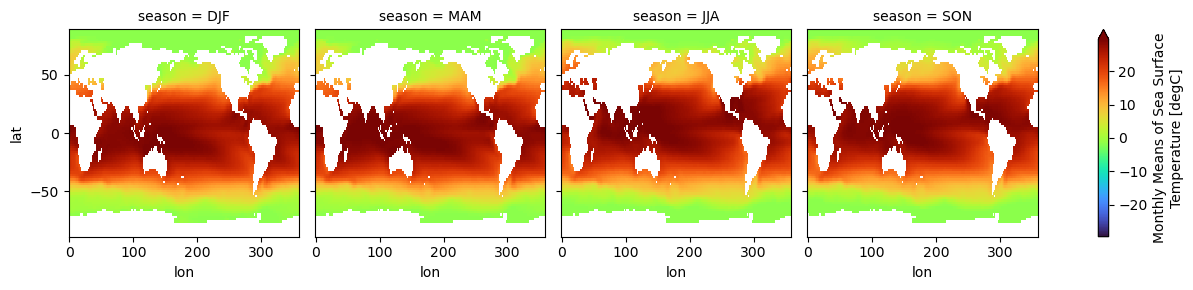

                                                                                                             
                                          Total time elapsed: 3.367 seconds                                  
                                       121 GPU function calls in 0.083 seconds                               
                                        4 CPU function calls in 0.002 seconds                                
                                                                                                             
                                                        Stats                                                
                                                                                                             
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__    │ 86         │ 0.026       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy       │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.__len__     │ 21         │ 0.006       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.copy        │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.set_names   │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.get_loc     │ 5          │ 0.044       │ 0.009       │ 0          │ 0.000       │ 0.000       │
│ StringIndex.__getitem__ │ 5          │ 0.005       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ isna                    │ 0          │ 0.000       │ 0.000       │ 4          │ 0.002       │ 0.001       │
└─────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=807656;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [15]:
%%cudf.pandas.profile

seasonal_mean.sst.plot(col="season", robust=True, cmap="turbo")

### resample


In [16]:
%%cudf.pandas.profile

# resample to bi-monthly frequency
ds.sst.resample(time="2MS").mean()

AttributeError: 'numpy.datetime64' object has no attribute 'replace'

                                                                                                                
                                           Total time elapsed: 8.645 seconds                                    
                                         36 GPU function calls in 0.015 seconds                                 
                                         0 CPU function calls in 0.000 seconds                                  
                                                                                                                
                                                         Stats                                                  
                                                                                                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                   ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ DatetimeIndex.__len__      │ 22         │ 0.007       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__deepcopy__ │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__len__       │ 8          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.copy         │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Index                      │ 1          │ 0.002       │ 0.002       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.set_names    │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.min          │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.max          │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
└────────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

### rolling window operations


In [17]:
%%cudf.pandas.profile

# A rolling mean with a window size of 7
ds.sst.rolling(time=7).mean()

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.8000001, -1.8000001, -1.8000001, ..., -1.8000001,
         -1.8000001, -1.8000001],
        [-1.8000001, -1.8000001, -1.8000001, ..., -1.8000001,
         -1.8000001, -1.8000001],
        [-1.8000001, -1.8000001, -1.8000001, ..., -1.8000001,
         -1.8000001, -1.8000001],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

                                                                                                                
                                           Total time elapsed: 0.805 seconds                                    
                                        576 GPU function calls in 0.218 seconds                                 
                                         0 CPU function calls in 0.000 seconds                                  
                                                                                                                
                                                         Stats                                                  
                                                                                                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                   ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__       │ 326        │ 0.098       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy          │ 16         │ 0.006       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__len__      │ 175        │ 0.055       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.copy         │ 11         │ 0.004       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__deepcopy__  │ 6          │ 0.006       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__deepcopy__ │ 3          │ 0.003       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__getitem__  │ 9          │ 0.009       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.equals        │ 10         │ 0.005       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.equals       │ 5          │ 0.007       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__   │ 12         │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__      │ 2          │ 0.012       │ 0.006       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__repr__     │ 1          │ 0.005       │ 0.005       │ 0          │ 0.000       │ 0.000       │
└────────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

## Going Further


<div class="alert alert-block alert-success">
  <p>Computation with xarray (extended version): <a href="../../scipy-tutorial/03.1_computation_with_xarray.ipynb">Computation with xarray notebook</a></p>
  <p>Plotting and visualization (extended version): <a href="../../scipy-tutorial/04_plotting_and_visualization.ipynb">Plotting and Visualization notebook</a></p>
</div>
